## Trabalho Prático - Predição de Localização Subcelular de Proteínas
### Tópicos Avançados - Computação Bioinspirada (SCC0911)

#### Alunos:
- Guilherme Souza Panza -
- Gustavo Sampaio Lima - 12623992
- Thaís Ribeiro Lauriano - 12542518

In [3]:
# Manipulação e visualização de dados
import pandas as pd
import matplotlib.pyplot as plt

# Divisão de dados e pré-processamento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Treinamento de modelos (ANNs)
import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# Avaliação dos modelos
from sklearn.metrics import classification_report, roc_auc_score

TypeError: unhashable type: 'list'

# Objetivo

O presente trabalho busca construir um modelo de classificação multirótulo inspirado numa estratégia fazendo uso de duas redes neurais artificiais.

In [2]:
!wget -O dataset_plant.tsv 'https://drive.google.com/uc?export=download&id=1bnS4lvFjGb5QSmqaVpWrJdJgvqVhCY7c' --no-check-certificate
!wget -O dataset_virus.tsv 'https://drive.google.com/uc?export=download&id=1X_A0zbjczBChcFRdhuZf8vqmye5ExnVU' --no-check-certificate

--2024-11-28 11:37:43--  https://drive.google.com/uc?export=download&id=1bnS4lvFjGb5QSmqaVpWrJdJgvqVhCY7c
Resolving drive.google.com (drive.google.com)... 172.217.0.78, 2607:f8b0:4025:810::200e
Connecting to drive.google.com (drive.google.com)|172.217.0.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1bnS4lvFjGb5QSmqaVpWrJdJgvqVhCY7c&export=download [following]
--2024-11-28 11:37:44--  https://drive.usercontent.google.com/download?id=1bnS4lvFjGb5QSmqaVpWrJdJgvqVhCY7c&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.15.225, 2607:f8b0:4025:802::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.15.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3581388 (3.4M) [application/octet-stream]
Saving to: ‘dataset_plant.tsv’

dataset_plant.tsv   100%[===================>]   3.42M  --.-KB/s    in 0.1

# Análise exploratória dos dados e pré-processamento

In [3]:
# Leitura dos datasets
path_plant = 'dataset_plant.tsv'
path_virus = 'dataset_virus.tsv'
plant_dataset = pd.read_csv(path_plant, sep="\t")
virus_dataset = pd.read_csv(path_virus, sep="\t")

In [4]:
plant_dataset.head(2)

,GO_ID,0005215,0005351,0005355,0005886,0005887,0006810,0015293,0015992,0016020,...,ChloroplastProteins,CytoplasmProteins,EndoplasmicReticulumProteins,ExtracellProteins,GolgiApparatusProteins,MitochondrionProteins,NucleusProteins,PeroxisomeProteins,PlastidProteins,VacuoleProteins
0,O23492,1,1,1,4,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,O50016,0,0,0,4,0,4,0,0,2,...,0,1,0,0,0,0,0,0,0,0


In [5]:
virus_dataset.head(2)

,GO_ID,0005198,0019012,0019028,0039625,0003723,0008270,0016020,0016032,0019076,...,0071555,0006955,0008009,0060326,ViralCapsidProteins,HostCellMembraneProteins,HostEndoplasmicReticulumProteins,HostCytoplasmProteins,HostNucleusProteins,SecretedProteins
0,P0C6L1,1,2,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,P32933,1,2,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [6]:
# Eliminando duplicatas e valores nulos
plant_dataset = plant_dataset.drop_duplicates().dropna()
virus_dataset = virus_dataset.drop_duplicates().dropna()

In [7]:
plant_stats = plant_dataset.describe().T
highest_std = plant_stats['std'].max()
highest_max = plant_stats['max'].max()
highest_media = plant_stats['mean'].max()

print(f"O valor do maior desvio padrão é: {highest_std}")
print(f"O valor do maior valor máximo é: {highest_max}")
print(f"O valor do maior valor médio é: {highest_media}")

O valor do maior desvio padrão é: 6.118425728531241
O valor do maior valor máximo é: 122.0
O valor do maior valor médio é: 1.046583850931677


In [8]:
virus_stats = virus_dataset.describe().T
highest_std = virus_stats['std'].max()
highest_max = virus_stats['max'].max()
highest_media = virus_stats['mean'].max()

print(f"O valor do maior desvio padrão é: {highest_std}")
print(f"O valor do maior valor máximo é: {highest_max}")
print(f"O valor do maior valor médio é: {highest_media}")

O valor do maior desvio padrão é: 6.1618416632470225
O valor do maior valor máximo é: 70.0
O valor do maior valor médio é: 1.5


In [9]:
# Normaliza todas as colunas
scaler = MinMaxScaler()
normalized_columns = plant_dataset.columns[1:1831] # 1° coluna é o ID. Entre 1 e 1831 são atributos, as ultimas 11 colunas são classes
target_df = plant_dataset[normalized_columns]
normalized_p = pd.DataFrame(scaler.fit_transform(target_df), columns=target_df.columns)

In [10]:
normalized_p.head(2)

,0005215,0005351,0005355,0005886,0005887,0006810,0015293,0015992,0016020,0016021,...,0005775,0042891,0043269,0033180,0005385,0006829,0006882,0046873,0061088,0071577
0,1.0,1.0,1.0,0.333333,1.0,0.25,0.5,0.25,0.333333,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.333333,0.0,1.00,0.0,0.00,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Normalizando para o dataset de virus
scaler = MinMaxScaler()
normalized_columns = virus_dataset.columns[1:362] # as ultimas 6 colunas são classes
target_df = virus_dataset[normalized_columns]
normalized_v = pd.DataFrame(scaler.fit_transform(target_df), columns=target_df.columns)

In [12]:
normalized_v.head(2)

,0005198,0019012,0019028,0039625,0003723,0008270,0016020,0016032,0019076,0020002,...,0031639,0006471,0016757,0016763,0005154,0007176,0008083,0071555,0006955,0008009
0,0.333333,0.333333,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.333333,0.333333,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Garantindo que os índices estejam alinhados
assert plant_dataset.index.equals(normalized_p.index), "Os índices não estão alinhados!"

# Renomeando colunas normalizadas
normalized_p.columns = [f'{col}_n' for col in normalized_p.columns]

# Juntando os dataframes
result = pd.concat([normalized_p, plant_dataset], axis=1)

# Removendo colunas originais já normalizadas
original_columns = plant_dataset.columns[1:1831]
new_plant_df = result.drop(columns=original_columns)
#new_plant_df.columns = new_plant_df.columns.str.replace('_n', '', regex=True)
new_plant_df

,0005215_n,0005351_n,0005355_n,0005886_n,0005887_n,0006810_n,0015293_n,0015992_n,0016020_n,0016021_n,...,ChloroplastProteins,CytoplasmProteins,EndoplasmicReticulumProteins,ExtracellProteins,GolgiApparatusProteins,MitochondrionProteins,NucleusProteins,PeroxisomeProteins,PlastidProteins,VacuoleProteins
0,1.0,1.0,1.0,0.333333,1.0,0.25,0.5,0.25,0.333333,0.50,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.333333,0.0,1.00,0.0,0.00,0.333333,0.00,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.166667,0.0,0.00,0.0,0.00,0.166667,0.00,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.666667,0.0,0.50,0.0,0.00,0.333333,0.75,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.166667,0.0,0.00,0.0,0.00,0.166667,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.166667,0.25,...,0,0,0,0,0,0,0,0,0,1
962,0.0,0.0,0.0,0.083333,0.0,0.25,0.0,0.00,0.333333,0.50,...,0,0,0,0,0,0,0,0,0,1
963,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.000000,0.00,...,0,0,0,0,0,0,0,0,0,1
964,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,0.25,0.166667,0.00,...,0,0,0,0,0,0,0,0,0,1


In [14]:
# Garantindo que os índices estejam alinhados
assert virus_dataset.index.equals(normalized_v.index), "Os índices não estão alinhados!"

# Renomeando colunas normalizadas
normalized_v.columns = [f'{col}_n2' for col in normalized_v.columns]

# Juntando os dataframes
result = pd.concat([normalized_v ,virus_dataset], axis=1)

# Removendo colunas originais já normalizadas
original_columns = virus_dataset.columns[1:362]
new_virus_df = result.drop(columns=original_columns)
new_virus_df

,0005198_n2,0019012_n2,0019028_n2,0039625_n2,0003723_n2,0008270_n2,0016020_n2,0016032_n2,0019076_n2,0020002_n2,...,0006955_n2,0008009_n2,GO_ID,0060326,ViralCapsidProteins,HostCellMembraneProteins,HostEndoplasmicReticulumProteins,HostCytoplasmProteins,HostNucleusProteins,SecretedProteins
0,0.333333,0.333333,0.5,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,P0C6L1,0,1,0,0,0,0,0
1,0.333333,0.333333,0.5,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,P32933,0,1,0,0,0,0,0
2,0.333333,0.333333,0.5,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,P32934,0,1,0,0,0,0,0
3,0.333333,0.333333,0.5,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,P32935,0,1,0,0,0,0,0
4,0.333333,0.333333,0.5,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,P33422,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,P16948,0,0,0,0,0,0,1
202,0.000000,0.000000,0.0,0.0,0.0,0.0,0.333333,0.166667,0.0,0.0,...,0.0,0.0,P20494,0,0,0,0,0,0,1
203,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,Q37979,0,0,0,0,0,0,1
204,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,Q90121,0,0,0,0,0,0,1


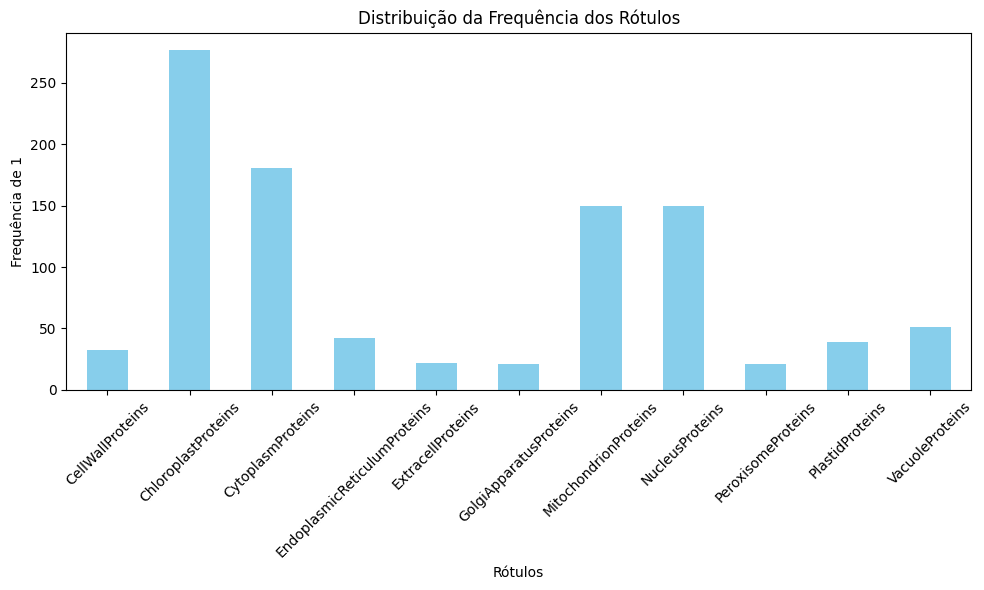

,0
CellWallProteins,32
ChloroplastProteins,277
CytoplasmProteins,181
EndoplasmicReticulumProteins,42
ExtracellProteins,22
GolgiApparatusProteins,21
MitochondrionProteins,150
NucleusProteins,150
PeroxisomeProteins,21
PlastidProteins,39


In [15]:
label_columns = new_plant_df.columns[1832:]

# Conta a frequência de '1' em cada coluna de rótulo
frequencies = new_plant_df[label_columns].sum()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Rótulos')
plt.ylabel('Frequência de 1')
plt.title('Distribuição da Frequência dos Rótulos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

frequencies

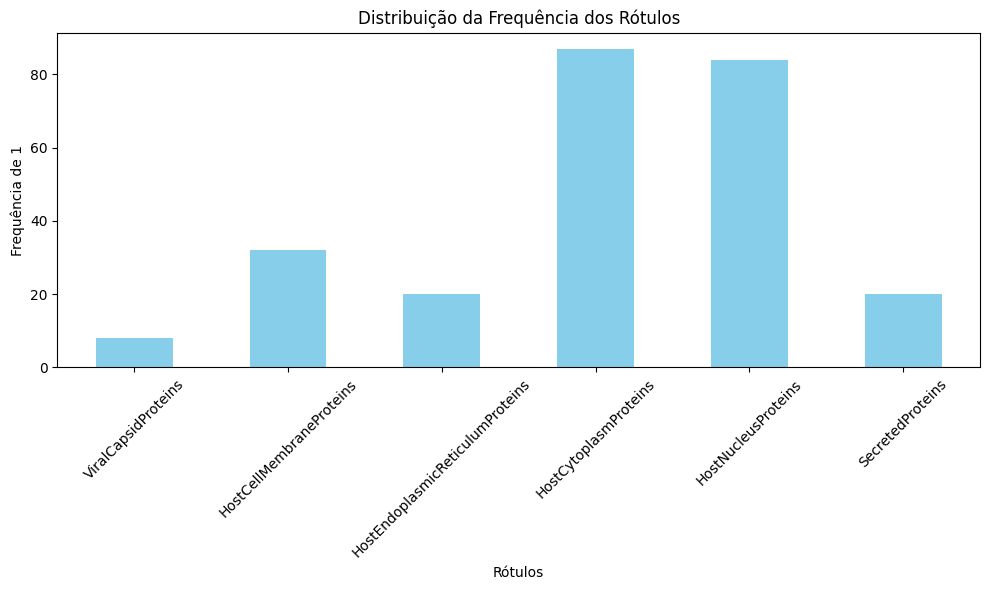

,0
ViralCapsidProteins,8
HostCellMembraneProteins,32
HostEndoplasmicReticulumProteins,20
HostCytoplasmProteins,87
HostNucleusProteins,84
SecretedProteins,20


In [16]:
label_columns = new_virus_df.columns[363:]

# Conta a frequência de '1' em cada coluna de rótulo
frequencies = new_virus_df[label_columns].sum()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
frequencies.plot(kind='bar', color='skyblue')
plt.xlabel('Rótulos')
plt.ylabel('Frequência de 1')
plt.title('Distribuição da Frequência dos Rótulos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

frequencies

# Divisão em treino e teste

In [17]:
new_plant_df.columns[1831:]

Index(['CellMembraneProteins', 'CellWallProteins', 'ChloroplastProteins',
       'CytoplasmProteins', 'EndoplasmicReticulumProteins',
       'ExtracellProteins', 'GolgiApparatusProteins', 'MitochondrionProteins',
       'NucleusProteins', 'PeroxisomeProteins', 'PlastidProteins',
       'VacuoleProteins'],
      dtype='object')

In [18]:
# Separar as features (X) e os alvos (y)
# Identificar colunas-alvo (classes) e features
target_columns = new_plant_df.columns[1831:]  # Colunas de classes (ajuste o índice se necessário)
y_plant = new_plant_df[target_columns]  # Alvos (classes binárias)
X_plant = new_plant_df.drop(columns=target_columns, axis=1)  # Remover as colunas de classes das features
X_plant = X_plant.drop(columns=['GO_ID'])

# # Dividir em treino e teste
X_plant_train, X_plant_test, y_plant_train, y_plant_test = train_test_split(X_plant, y_plant, test_size=0.2, random_state=42)

In [19]:
X_plant_train.head(1)

,0005215_n,0005351_n,0005355_n,0005886_n,0005887_n,0006810_n,0015293_n,0015992_n,0016020_n,0016021_n,...,0005775_n,0042891_n,0043269_n,0033180_n,0005385_n,0006829_n,0006882_n,0046873_n,0061088_n,0071577_n
720,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.166667,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y_plant_train.head(1)

,CellMembraneProteins,CellWallProteins,ChloroplastProteins,CytoplasmProteins,EndoplasmicReticulumProteins,ExtracellProteins,GolgiApparatusProteins,MitochondrionProteins,NucleusProteins,PeroxisomeProteins,PlastidProteins,VacuoleProteins
720,0,0,0,0,0,0,0,1,0,0,0,0


In [21]:
new_virus_df.columns[363:]

Index(['ViralCapsidProteins', 'HostCellMembraneProteins',
       'HostEndoplasmicReticulumProteins', 'HostCytoplasmProteins',
       'HostNucleusProteins', 'SecretedProteins'],
      dtype='object')

In [22]:
target_columns = new_virus_df.columns[363:]  # Colunas de classes (ajuste o índice se necessário)
y_virus = new_virus_df[target_columns]  # Alvos (classes binárias)
X_virus = new_virus_df.drop(columns=target_columns, axis=1)  # Remover as colunas de classes das features
X_virus = X_virus.drop(columns=['GO_ID'])

# # Dividir em treino e teste
X_virus_train, X_virus_test, y_virus_train, y_virus_test = train_test_split(X_virus, y_virus, test_size=0.2, random_state=42)

In [23]:
X_virus_train.head(1)

,0005198_n2,0019012_n2,0019028_n2,0039625_n2,0003723_n2,0008270_n2,0016020_n2,0016032_n2,0019076_n2,0020002_n2,...,0006471_n2,0016757_n2,0016763_n2,0005154_n2,0007176_n2,0008083_n2,0071555_n2,0006955_n2,0008009_n2,0060326
144,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
y_virus_train.head(1)

,ViralCapsidProteins,HostCellMembraneProteins,HostEndoplasmicReticulumProteins,HostCytoplasmProteins,HostNucleusProteins,SecretedProteins
144,0,0,0,0,1,0


# Treinamento dos modelos

## Treinamento para dados de plantas

In [ ]:
# Definir o número de atributos e classes
n_features = X_plant_train.shape[1]
n_classes = y_plant_train.shape[1]

# Construção da rede neural
model_plants = Sequential([
    Dense(128, input_dim=n_features, activation="relu"),  # Camada densa inicial
    Dropout(0.3),  # Regularização
    Dense(64, activation="relu"),  # Camada intermediária
    Dropout(0.3),
    Dense(n_classes, activation="sigmoid")  # Camada de saída (ativação sigmoidal para multirrótulo)
])

# Compilação do modelo
model_plants.compile(
    optimizer="adam",
    loss="binary_crossentropy",  # Perda para multirrótulo
    metrics=["accuracy"]
)

# Treinamento
history = model_plants.fit(
    X_plant_train, y_plant_train,
    validation_data=(X_plant_test, y_plant_test),
    epochs=50,
    batch_size=32
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1361 - loss: 0.6627 - val_accuracy: 0.2732 - val_loss: 0.5292
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2320 - loss: 0.4649 - val_accuracy: 0.2784 - val_loss: 0.3153
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3095 - loss: 0.3119 - val_accuracy: 0.3041 - val_loss: 0.2831
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3758 - loss: 0.2617 - val_accuracy: 0.4124 - val_loss: 0.2627
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4651 - loss: 0.2406 - val_accuracy: 0.4845 - val_loss: 0.2405
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5345 - loss: 0.2088 - val_accuracy: 0.5567 - val_loss: 0.2201
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6048 - loss: 0.1808 - val_accuracy: 0.5619 - val_loss: 0.2009
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6436 - loss: 0.1630 - val_accuracy: 0.5773 - val_loss: 0.1848
Ep

In [ ]:
# Previsões
y_plant_pred = (model_plants.predict(X_plant_test) > 0.5).astype(int)

# Relatório de classificação
print(classification_report(y_plant_test, y_plant_pred, target_names=y_plant.columns))

# AUC-ROC para cada classe
roc_auc = roc_auc_score(y_plant_test, y_plant_pred, average=None)
print(f"AUC-ROC por classe: {roc_auc}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
                              precision    recall  f1-score   support

        CellMembraneProteins       0.75      0.86      0.80         7
            CellWallProteins       0.88      0.64      0.74        11
         ChloroplastProteins       0.92      0.91      0.92        54
           CytoplasmProteins       0.90      0.67      0.77        27
EndoplasmicReticulumProteins       0.83      0.45      0.59        11
           ExtracellProteins       0.75      0.38      0.50         8
      GolgiApparatusProteins       1.00      0.20      0.33         5
       MitochondrionProteins       0.88      0.81      0.84        26
             NucleusProteins       0.91      0.91      0.91        35
          PeroxisomeProteins       1.00      0.14      0.25         7
             PlastidProteins       1.00      0.92      0.96        12
             VacuoleProteins       0.62      0.50      0.56        10

                   micro avg       0.89      0.75 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Treinamento para dados de vírus

In [ ]:
# Definir o número de atributos e classes
n_features = X_virus_train.shape[1]
n_classes = y_virus_train.shape[1]

# Construção da rede neural
model = Sequential([
    Dense(128, input_dim=n_features, activation="relu"),  # Camada densa inicial
    Dropout(0.3),  # Regularização
    Dense(64, activation="relu"),  # Camada intermediária
    Dropout(0.3),
    Dense(n_classes, activation="sigmoid")  # Camada de saída (ativação sigmoidal para multirrótulo)
])

# Compilação do modelo
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",  # Perda para multirrótulo
    metrics=["accuracy"]
)

# Treinamento
history = model.fit(
    X_virus_train, y_virus_train,
    validation_data=(X_virus_test, y_virus_test),
    epochs=50,
    batch_size=32

)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.1582 - loss: 0.6730 - val_accuracy: 0.3571 - val_loss: 0.6471
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2748 - loss: 0.6368 - val_accuracy: 0.4762 - val_loss: 0.6108
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3870 - loss: 0.5995 - val_accuracy: 0.4524 - val_loss: 0.5706
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4088 - loss: 0.5663 - val_accuracy: 0.5238 - val_loss: 0.5291
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4435 - loss: 0.5315 - val_accuracy: 0.5476 - val_loss: 0.4886
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4735 - loss: 0.4817 - val_accuracy: 0.5952 - val_loss: 0.4509
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4657 - loss: 0.4580 - val_accuracy: 0.6190 - val_loss: 0.4216
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5494 - loss: 0.4227 - val_accuracy: 0.7143 - val_loss: 0.3979
Epoch 9/50


In [ ]:
# Avaliação de desempenho

def hamming_loss():
  ...